In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#creating function to split data:
def prepare_data(df,forecast_col,forecast_out,test_size):
    
    label = df[forecast_col].shift(-forecast_out) 
    X = np.array(df[[forecast_col]]) 
    X = preprocessing.scale(X) 
    X_predict = X[-forecast_out:] #column to use later in the predicting method
    X = X[:-forecast_out] 
    label.dropna(inplace=True) #dropping na 
    y = np.array(label)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) 

    results = [X_train,X_test,Y_train,Y_test,X_predict]
    return results

<AxesSubplot:>

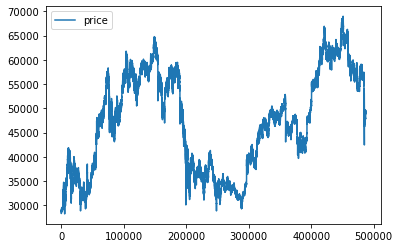

In [3]:
#my data: bitcoin prices (downloaded from kaggle)
df = pd.read_csv(r'/Users/Gal/Documents/Courses/python/bitcoin/binance_btcusdt_kline_1m.csv')
df = df.rename(columns={'t': 'days','o': 'price'})

t1 = pd.DataFrame(df, columns=["price"])
t1.plot()

In [24]:
X_train, X_test, Y_train, Y_test , X_predict =prepare_data(df,'price',100000,0.6); 

modelfit = LinearRegression() 

modelfit.fit(X_train,Y_train) 

LinearRegression()

In [20]:
score=modelfit.score(X_test,Y_test)
forecast= modelfit.predict(X_predict)

print(score)

0.10062614958976346


In [21]:
price_arr = np.array(t1)

In [22]:
joined = np.concatenate((price_arr, forecast.reshape(-1,1)))

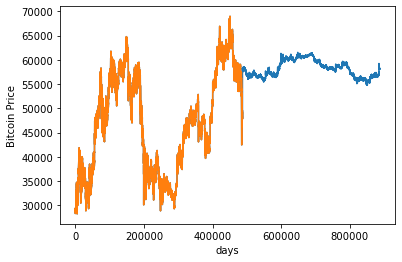

In [23]:
#data in orange, prediction in blue:
plt.plot(joined)
plt.plot(price_arr)

plt.xlabel("days")
plt.ylabel("Bitcoin Price")

plt.show()